In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
from keras.models import Sequential
import tensorflow as tf

import tensorflow_datasets as tfds

tf.executing_eagerly()

True

In [ ]:
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import random
from numpy import *
from PIL import Image
import theano

In [ ]:
#Image processing and sending it to a dataset
training_data=[]
DATADIR='/content/drive/MyDrive/Image_classification/datasets'
CATEGORIES=["meter","non_meter"]
def create_training_data():
  for category in CATEGORIES:
    path=os.path.join(DATADIR,category) #path to meter or non-meter dir
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        image = Image.open(path + '/'+ img).convert('RGB')
        image = image.resize((32,32))
        new_array = np.array(image)
        training_data.append([new_array,class_num])
      except Exception as e:
        pass

create_training_data()     

In [ ]:
#for Grayscale images
#img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
#new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))

In [ ]:
print(len(training_data))
import random
random.shuffle(training_data)

2138


In [ ]:
for sample in training_data[:10]:
  print(sample[1])

0
0
1
1
0
0
0
1
0
0


In [ ]:
#training_data[:5]
X=[]
y=[]
for features,label in training_data:
  X.append(features)
  y.append(label)
IMG_SIZE=32
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,3)

In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
import pickle
pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [ ]:
pwd

'/content/drive/My Drive'

In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
import pickle
with open('X.pickle', 'rb') as f:
    X = pickle.load(f)

with open('y.pickle', 'rb') as f:
     Y= pickle.load(f)    

In [ ]:
#X[1]
X = X.astype('float32')
X /= 255
from keras.utils import np_utils
#Y = np_utils.to_categorical(Y,1)
print(Y[100])
print(shape(Y))

1
(2138,)


In [ ]:
Y=np.array(Y)

In [ ]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
#print(shape(X))
#X[1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1710, 32, 32, 3) (428, 32, 32, 3) (1710,) (428,)


#OUR CNN MODEL

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [75,75]
train_path = '/content/drive/MyDrive/Train.zip (Unzipped Files)/Train'
valid_path = '/content/drive/MyDrive/Test' 

In [ ]:
from glob import glob
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Train.zip (Unzipped Files)/Train/*')

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Train.zip (Unzipped Files)/Train',
                                                 target_size = (150,150),
                                                 batch_size = 20,
                                                 class_mode = 'categorical')

Found 3114 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Test',
                                            target_size = (100,100),
                                            batch_size = 20,
                                            class_mode = 'categorical')

Found 132 images belonging to 2 classes.


In [ ]:
batch_size =32
nb_classes =2
nb_epochs = 20
img_rows, img_columns = 200, 200
img_channel = 1
nb_filters = 32
nb_pool = 5
nb_conv = 5

In [ ]:
#OUR CUSTOM MODEL
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
#def create_model():
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(150,150,3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
inc_history = model.fit_generator(training_set, validation_data = test_set, steps_per_epoch = 10, epochs =20,validation_steps=len(test_set))
#return model

# Display the model's architecture
model.summary()
#tf.nn.softmax

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
10/10 [==============================] - 80s 8s/step - loss: 2.0025 - accuracy: 0.5770 - val_loss: 0.6203 - val_accuracy: 0.8561
Epoch 2/20
10/10 [==============================] - 84s 9s/step - loss: 0.6435 - accuracy: 0.6337 - val_loss: 0.4076 - val_accuracy: 0.8333
Epoch 3/20
10/10 [==============================] - 83s 9s/step - loss: 0.5711 - accuracy: 0.6956 - val_loss: 0.5250 - val_accuracy: 0.8561
Epoch 4/20
10/10 [==============================] - 76s 8s/step - loss: 0.5551 - accuracy: 0.7392 - val_loss: 0.3482 - val_accuracy: 0.8409
Epoch 5/20
10/10 [==============================] - 77s 8s/step - loss: 0.3991 - accuracy: 0.8538 - val_loss: 0.3606 - val_accuracy: 0.8258
Epoch 6/20
10/10 [==============================] - 77s 8s/step - loss: 0.4928 - accuracy: 0.7914 - val_loss: 0.3628 - val_accuracy: 0.8788
Epoch 7/20
10/10 [==============================] - 76s 8s/step - loss: 0.4808 - accuracy: 0.7841 - val_loss: 0.6038 - val_accuracy: 0.6970
Epoch 8/20
10/10 [==

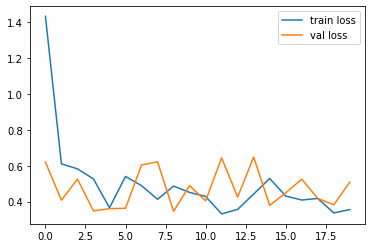

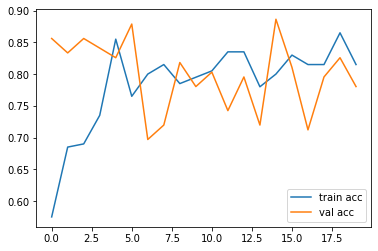

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(inc_history.history['loss'], label='train loss')
plt.plot(inc_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(inc_history.history['accuracy'], label='train acc')
plt.plot(inc_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('custom_model.h5')

In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
import tensorflow as tf
new_model = tf.keras.models.load_model('Knight.h5')
tf.saved_model.save(new_model, "Final")
#print("successfully saved keras model file to tensorflow model file")
# Show the model architecture
new_model.summary()


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: Final/assets
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 92, 92, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 46, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64) 

In [ ]:
pwd

'/content'

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image

New_Model = tf.keras.models.load_model('Dogs_Vs_Cats_Model') # Loading the Tensorflow Saved Model (PB)
print(New_Model.summary())

Test images

In [ ]:
classes = { 0:'real',
            1:'spoof'}

In [ ]:
#folder_path=(r'/content/drive/MyDrive/Test/0')
folder_path=(r'/content/drive/MyDrive/Test/1')

In [ ]:
# load all images into a list
import os
images = []
for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    image = Image.open(img).convert('RGB')
    image = image.resize((100,100))
    image = np.expand_dims(image, axis=0)
    images.append(np.array(image))

In [ ]:
# stack up images list to pass for prediction
images = np.vstack(images)
classes = new_model.predict_classes(images, batch_size=2)
print(classes)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predictions and Visualizations

In [ ]:
#y_pred =new_model.predict(test_set)
#len(y_pred)
pred=[]
for i in range(len(y_pred)):
  if (y_pred[i][0]<0.5) and (y_pred[i][1]>0.5):
    pred.append(1)
  elif (y_pred[i][0]>0.5) and (y_pred[i][1]<0.5):
    pred.append(0)
  else:
    continue

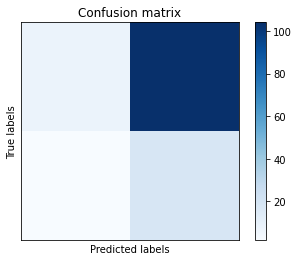

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
cm = metrics.confusion_matrix(test_set.classes,pred)
# or
#cm = np.array([[1401,    0],[1112, 0]])
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([],[])
plt.yticks([],[])
plt.title('Confusion matrix')
plt.colorbar()
plt.show()

In [ ]:
print('Confusion Matrix')
cm = metrics.confusion_matrix(test_set.classes, pred)
print(cm)
print('Classification Report')
print(metrics.classification_report(test_set.classes,pred))

Confusion Matrix
[[  8 104]
 [  2  18]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.07      0.13       112
           1       0.15      0.90      0.25        20

    accuracy                           0.20       132
   macro avg       0.47      0.49      0.19       132
weighted avg       0.70      0.20      0.15       132



In [ ]:
a=[]
for i in range(0,len(pred)):
  if pred[i]!=test_set.classes[i]:
    a.append(i)

In [ ]:
#test_set.classes
a

[5,
 6,
 10,
 12,
 14,
 22,
 23,
 25,
 28,
 31,
 36,
 42,
 48,
 52,
 62,
 64,
 68,
 69,
 71,
 72,
 75,
 79,
 82,
 84,
 86,
 89,
 90,
 91,
 92,
 95,
 99,
 111,
 112,
 115,
 116,
 117,
 118,
 121,
 122,
 123,
 124,
 126,
 127,
 128,
 129,
 130,
 131]

Below should be used when doing train-test split is done

In [ ]:
cd /content/drive/MyDrive/Image_classification/datasets/new

/content/drive/MyDrive/Image_classification/datasets/new


In [ ]:
model.save('my_model.h5') 
# Recreate the exact same model, including its weights and the optimizer
#keras model converted to TF SavedModel format
import tensorflow as tf
new_model = tf.keras.models.load_model('my_model.h5')
tf.saved_model.save(new_model, "new")
print("successfully saved keras model file to tensorflow model file")
# Show the model architecture
new_model.summary()


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: new/assets
successfully saved keras model file to tensorflow model file
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 11, 11, 32)        0         
_____________________________________________________

Converting saved_model to tensorflowlite model

In [ ]:
#Converting saved_model to tensorflowlite model
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('/content/drive/MyDrive/Image_classification/datasets/new/models') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

Testing on new data

In [ ]:
cd /content/drive/MyDrive/Image_classification/datasets/new
from keras.models import load_model
new_model = tf.keras.models.load_model('my_model.h5')

Test-1 (Individual Images tests)


In [ ]:
classes = { '[0]':'real',
            '[1]':'spoof'}
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img).convert('RGB')
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


['[0]']
Predicted Meter image is:  real


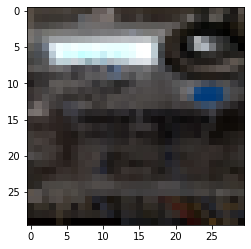

In [ ]:
plot,prediction = test_on_img(r'/content/drive/MyDrive/Image_classification/datasets/new/fxeJAPbxLek_owO2RNagXhNzZTJm4Si2V4yrnEF3_bigImg_1589696090.jpg')
s = [str(i) for i in prediction] 
print(s)
a =s[0] 
print("Predicted Meter image is: ", classes[a])
plt.imshow(plot)
plt.show()

['[1]']
Predicted Meter image is:  spoof


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


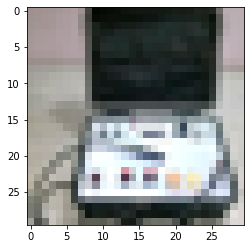

In [ ]:
plot,prediction = test_on_img(r'/content/drive/MyDrive/Image_classification/datasets/new/internet_non-meter.jpg')
s = [str(i) for i in prediction] 
print(s)
a =s[0] 
print("Predicted Meter image is: ", classes[a])
plt.imshow(plot)
plt.show()

['[0]']
Predicted Meter image is:  real


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


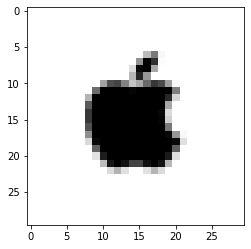

In [ ]:
plot,prediction = test_on_img(r'/content/drive/MyDrive/Image_classification/datasets/new/Apple_lol.jpg')
s = [str(i) for i in prediction] 
print(s)
a =s[0] 
print("Predicted Meter image is: ", classes[a])
plt.imshow(plot)
plt.show()